In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import uproot
from pyts.visualization import plot_mtf, plot_gasf, plot_gadf, plot_recurrence_plots


file = "RefPulse009.root"


CPU times: user 915 ms, sys: 328 ms, total: 1.24 s
Wall time: 2.01 s


In [2]:
def reader_pmtall(path):
    extra = np.arange(4096, 4480)
    
    tree = uproot.open(path)["tree"]
    pmtall = tree.array("PMTALL")
    pmtall = np.delete(pmtall, extra, axis=1)
    pedestal = tree.array("Pedestal")
    pedestal = pedestal[:,0]
    
    for i in range(len(pedestal)):
        pmtall[i] = -(pmtall[i]-pedestal[i])
    
    return pmtall

def reader(path,branch,number):
    tree = uproot.open(path)["tree"]
    column = tree.array(branch)
    column = column[:,number]
    return column

def reader_lone(path,branch):
    tree = uproot.open(path)["tree"]
    column = tree.array(branch)
    return column


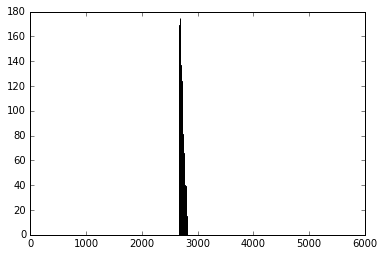

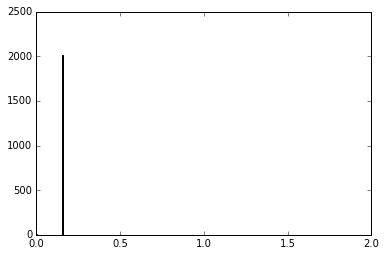

NameError: name 'pls' is not defined

In [5]:
waveforms = reader_pmtall(file)
energy = reader(file,"Energy",1)
ratio4us = reader_lone(file,"Ratio4us")
length = len(waveforms)
psdpara1 = reader(file,"PSDPara",1)

plt.figure()
plt.hist(energy,bins=np.arange(0,6000,5))
plt.show()

plt.figure()
plt.hist(ratio4us,bins=np.arange(0,2,0.01))
plt.show()

plt.figure()
pls.hist(psdpara1)
plt.show()

for i in range(20):
    k = np.random.randint(length)
    plt.figure()
    plt.plot(np.arange(4096),waveforms[k])
    plt.show()
    print(energy[k])
    print(ratio4us[k])
    plot_gasf(waveforms[k], image_size=128, overlapping=False, scale='-1')
    plt.show()

